## The Data

For simplicity, we download the data here and save locally

In [1]:
import pandas as pd

def get_LINEAR_lightcurve(lcid):
    from astroML.datasets import fetch_LINEAR_sample
    LINEAR_sample = fetch_LINEAR_sample()
    data = pd.DataFrame(LINEAR_sample[lcid],
                        columns=['t', 'mag', 'magerr'])
    data.to_csv('LINEAR_{0}.csv'.format(lcid), index=False)
  
# Uncomment to download the data
# get_LINEAR_lightcurve(lcid=11375941)

In [2]:
data = pd.read_csv('LINEAR_11375941.csv')
data.head()

,t,mag,magerr
0,52650.434545,15.969,0.035
1,52650.448450,16.036,0.039
2,52650.462420,15.990,0.035
3,52650.476485,16.027,0.035
4,52650.490443,15.675,0.030


## The Survey Window

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

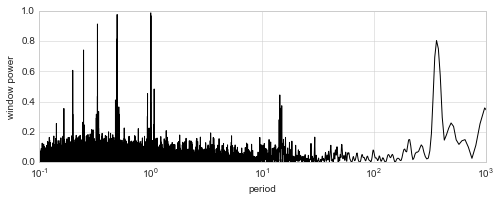

In [4]:
from astropy.stats import LombScargle

ls = LombScargle(data.t, 1, fit_mean=False, center_data=False)
freqW, powerW = ls.autopower(minimum_frequency=0, maximum_frequency=24)

fig, ax = plt.subplots(figsize=(8, 3))
fig.subplots_adjust(bottom=0.2)
ax.set_xscale('log')
ax.plot(1. / freqW, powerW, '-k', rasterized=True)

ax.set(xlabel='period',
       ylabel='window power',
       xlim=(0.1, 1000));

fig.savefig('fig14_LINEAR_window.pdf')

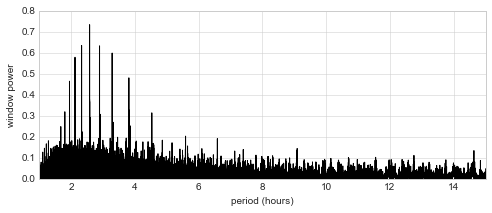

In [5]:
ls = LombScargle(data.t, data.mag, data.magerr)
freq, power = ls.autopower(minimum_frequency=0, maximum_frequency=35)

period_days = 1. / freq
period_hours = 24. / freq

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(period_hours, power, '-k', rasterized=True)

ax.set(xlim=(1, 15),
       xlabel='period (hours)',
       ylabel='window power');

In [6]:
fmax = freq[np.argmax(power)]
print(fmax)

9.30184494756


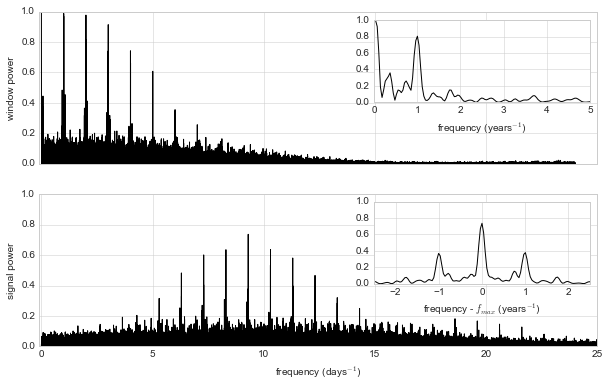

In [7]:
fig, ax = plt.subplots(2, figsize=(10, 6), sharex=True, sharey=True)
ax[0].plot(freqW, powerW, '-k', rasterized=True)

ax[1].plot(freq, power, '-k', rasterized=True)


ax[0].set(ylabel='window power')
ax[1].set(xlabel='frequency (days$^{-1}$)',
          ylabel='signal power',
          xlim=(-0.1, 25),
          ylim=(0, 1))

inset = [fig.add_axes([0.59, 0.69, 0.30, 0.19]),
         fig.add_axes([0.59, 0.27, 0.30, 0.19])]

inset[0].plot(freqW * 365, powerW, '-k')
inset[1].plot((freq - fmax) * 365, power, '-k')

inset[0].set(xlabel='frequency (years$^{-1}$)',
             xlim=(0, 5), ylim=(0, 1))
inset[1].set(xlabel='frequency - $f_{max}$ (years$^{-1}$)',
             xlim=(-2.5, 2.5), ylim=(0, 1));

fig.savefig('fig15_LINEAR_window_effect.pdf')